In [1]:
import pandas as pd
data=pd.read_csv('Cell_stats_sim_1.csv',header=None)
data.columns = ['time', 'time_of_day','cell_id','habitat_type','cell_energy_pool','krat_pop','krat_energy','krat_movement','snake_pop','snake_energy','snake_movement']
data['habitat_type'] = data['habitat_type'].replace(to_replace='[<MicrohabitatType.OPEN: 1>]', value='OPEN')
data['habitat_type'] = data['habitat_type'].replace(to_replace='[<MicrohabitatType.BUSH: 2>]', value='BUSH')

In [2]:
#cell_id = str((0,0))
cell = data['habitat_type'][1]
print(cell)
#data.iloc[2950:].head()
data.iloc[1500:].head(20)

BUSH


,time,time_of_day,cell_id,habitat_type,cell_energy_pool,krat_pop,krat_energy,krat_movement,snake_pop,snake_energy,snake_movement
1500,0,0,"(30, 0)",BUSH,1200,0,0.0,0,0,0.0,0
1501,0,0,"(30, 1)",OPEN,1200,0,0.0,0,0,0.0,0
1502,0,0,"(30, 2)",OPEN,1200,1,40.0,0,0,0.0,0
1503,0,0,"(30, 3)",OPEN,1200,0,0.0,0,0,0.0,0
1504,0,0,"(30, 4)",OPEN,1200,0,0.0,0,0,0.0,0
1505,0,0,"(30, 5)",BUSH,1200,0,0.0,0,0,0.0,0
1506,0,0,"(30, 6)",BUSH,1200,1,40.0,0,0,0.0,0
1507,0,0,"(30, 7)",OPEN,1200,0,0.0,0,0,0.0,0
1508,0,0,"(30, 8)",OPEN,1200,0,0.0,0,0,0.0,0
1509,0,0,"(30, 9)",OPEN,1200,0,0.0,0,0,0.0,0


In [2]:
data_initial_time= data['time']== min(data['time'])
data_initial_time = data[data_initial_time]
initial_time = data_initial_time['time'].max()
initial_krat_pop = data_initial_time['krat_pop'].sum()
initial_snake_pop = data_initial_time['snake_pop'].sum()
avg_cell_energy = data_initial_time['cell_energy_pool'].sum()/len(data_initial_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(initial_time,avg_cell_energy,initial_krat_pop,initial_snake_pop)
cells = data['cell_id'].unique()
print('Number Of Cells: {}'.format(len(cells)))
print('Initial Stats')
print(prompt)

data_final_time= data['time']== max(data['time'])
data_final_time = data[data_final_time]
final_time = data_final_time['time'].max()
final_krat_pop = data_final_time['krat_pop'].sum()
final_snake_pop = data_final_time['snake_pop'].sum()
avg_cell_energy = data_final_time['cell_energy_pool'].sum()/len(data_final_time['cell_energy_pool'])
prompt = 'time: {}, Avg Cell Energy {}, Krats {}, Snakes {}'.format(final_time,avg_cell_energy,final_krat_pop,final_snake_pop)
print('Final Stats')
print(prompt)


Number Of Cells: 2500
Initial Stats
time: 0, Avg Cell Energy 1200.0, Krats 150, Snakes 15
Final Stats
time: 8748, Avg Cell Energy 1394.7528, Krats 149, Snakes 16


149.0


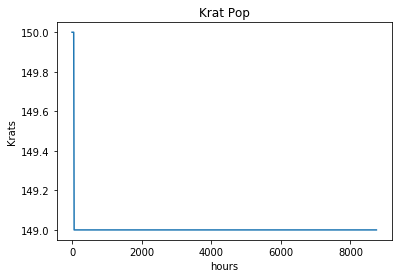

In [3]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "krat_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
x = xtemp[0:len(y)]
print(min(y))

plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krats")
plt.title("Krat Pop")

plt.show()

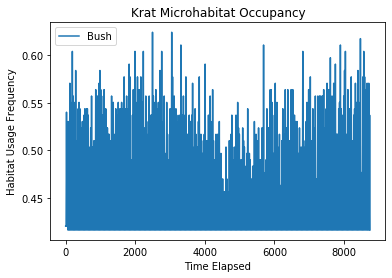

In [4]:
df = data.groupby(["time","habitat_type"]).agg({'krat_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','krat_pop']
df = df.pivot(index='time', columns='habitat_type', values='krat_pop').reset_index()
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('Krat Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

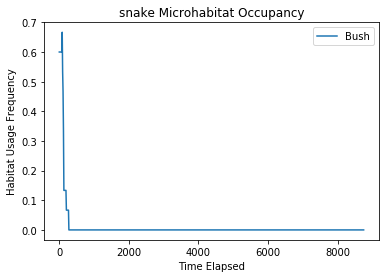

In [5]:
df = data.groupby(["time","habitat_type"]).agg({'snake_pop': ['sum']}).reset_index()
df.columns = ['time','habitat_type','snake_pop']
df = df.pivot(index='time', columns='habitat_type', values='snake_pop').reset_index()
df['BUSH_OCC'] = df['BUSH']/(df['BUSH']+df['OPEN'])
df['OPEN_OCC'] = df['OPEN']/(df['BUSH']+df['OPEN'])
df= df[['time','BUSH_OCC','OPEN_OCC']]
# line 1 points

# plotting the line 1 points 
plt.plot(df['time'], df['BUSH_OCC'], label = "Bush")
# line 2 points

#plt.plot(df['time'], df['OPEN_OCC'], label = "Open")
plt.xlabel('Time Elapsed')
# Set the y axis label of the current axis.
plt.ylabel('Habitat Usage Frequency')
# Set a title of the current axes.
plt.title('snake Microhabitat Occupancy')
# show a legend on the plot
plt.legend()
# Display a figure.
plt.show()

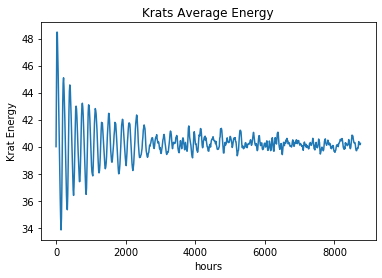

In [6]:
df = pd.DataFrame(data[["time","krat_pop", "krat_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_energy'] = df['krat_energy']/df['krat_pop']
ytemp = list(df['average_krat_energy'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat Energy")
plt.title("Krats Average Energy")

plt.show()

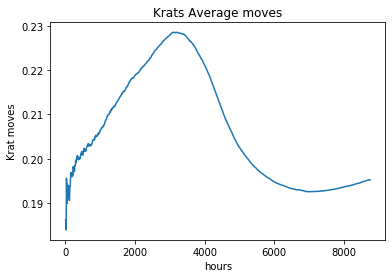

In [7]:
df = pd.DataFrame(data[["time","krat_pop", "krat_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_krat_movment'] = (df['krat_movement']/df['krat_pop'])/df['time']
ytemp = list(df['average_krat_movment'])
#if y>0
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Krat moves")
plt.title("Krats Average moves")

plt.show()

15.0


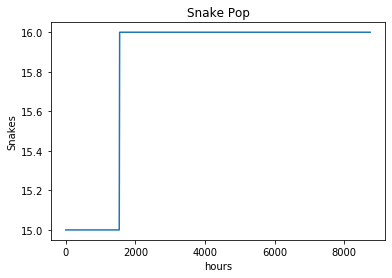

In [8]:
import matplotlib.pyplot as plt
import numpy as np

df = data[["time", "snake_pop"]].groupby("time").sum()
ytemp = list(df.stack())
y = [float(y) for y in ytemp]
xtemp= list(df.index)
#xtemp = list(df['time_of_day'])
x = xtemp[0:len(y)]
print(min(y))


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snakes")
plt.title("Snake Pop")

plt.show()

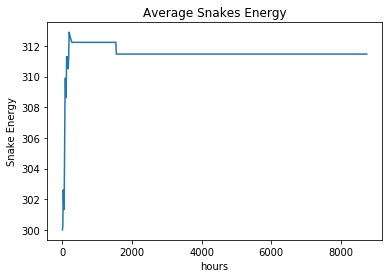

In [9]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
ytemp = list(df['average_snake_energy'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake Energy")
plt.title("Average Snakes Energy")

plt.show()

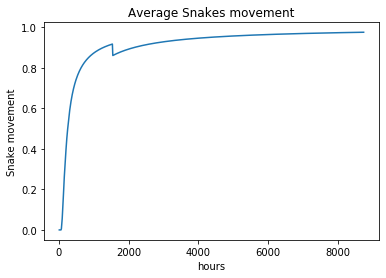

In [10]:
df = pd.DataFrame(data[["time","snake_pop", "snake_movement"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_movement'] = (df['snake_movement']/df['snake_pop'])/df['time']
ytemp = list(df['average_snake_movement'])
y = [y for y in ytemp]
x= list(df['time'])


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Snake movement")
plt.title("Average Snakes movement")

plt.show()

In [11]:
df = pd.DataFrame(data[["time","snake_pop", "snake_energy"]].groupby("time").sum())
df.reset_index(inplace=True)
df['average_snake_energy'] = df['snake_energy']/df['snake_pop']
df.head()

,time,snake_pop,snake_energy,average_snake_energy
0,0,15,4500.00,300.000000
1,12,15,4504.00,300.266667
2,24,15,4539.00,302.600000
3,36,15,4524.75,301.650000
4,48,15,4520.00,301.333333


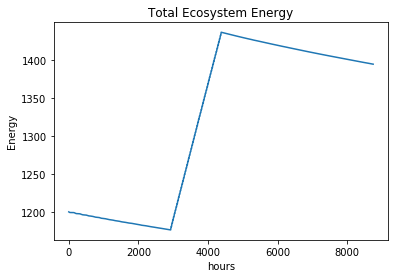

In [12]:
df = data[["time", "cell_energy_pool"]].groupby("time").sum()
cells = data['cell_id'].unique()

ytemp = list(df.stack())
#if (y/80)>2140
y = [y/len(cells) for y in ytemp ]
xtemp= list(df.index)
x = xtemp[0:len(y)]


plt.figure()
plt.plot(x, y)
#plt.set_xticks(np.arrange(0,len(x),6))
#plt.set_xticklabels(np.arrange(0,len(x),6))

plt.xlabel("hours")
plt.ylabel("Energy")
plt.title("Total Ecosystem Energy")

plt.show()

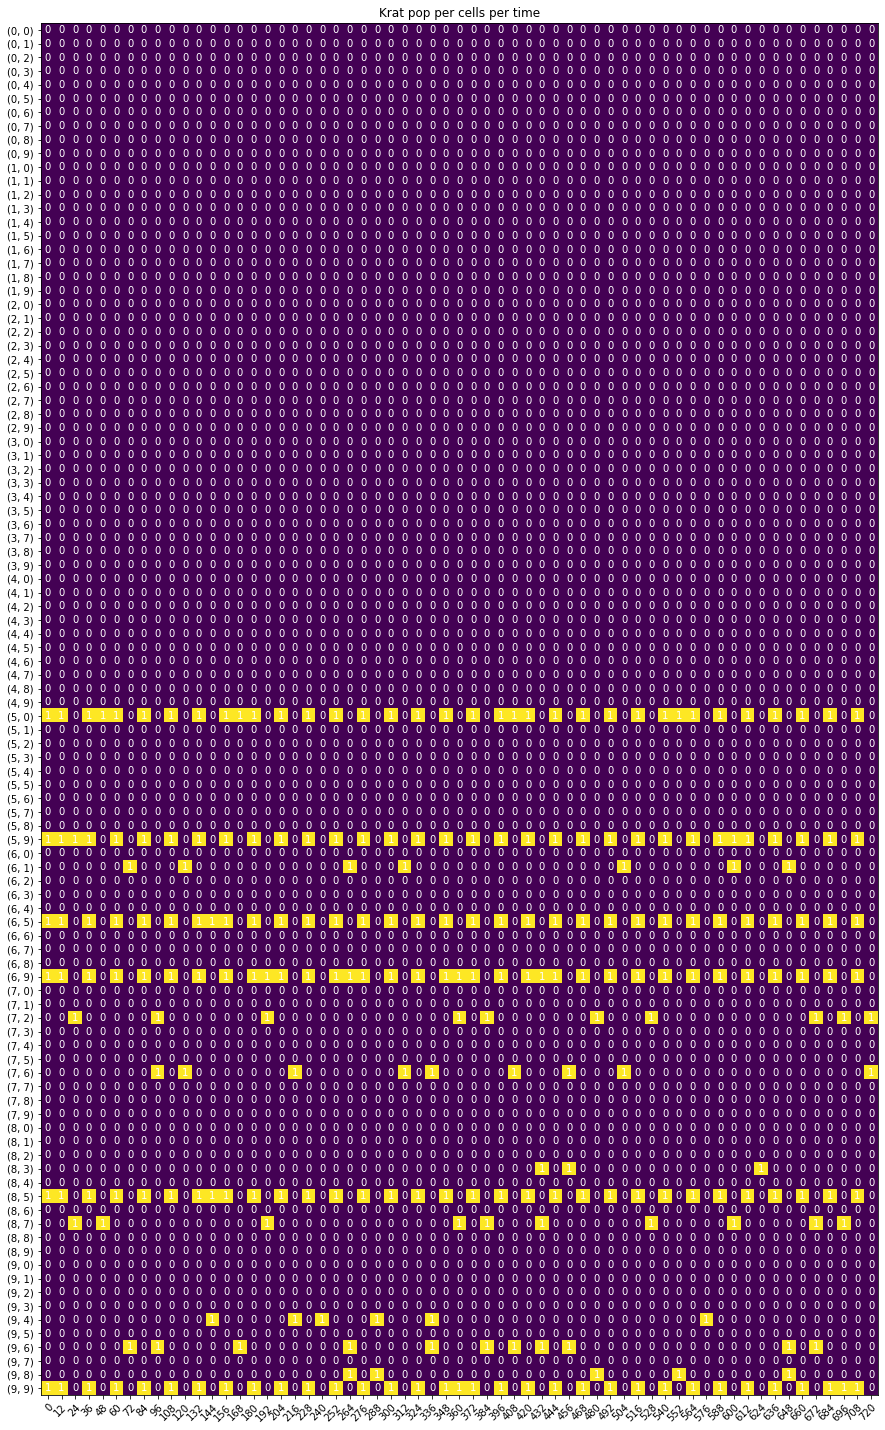

In [13]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
# sphinx_gallery_thumbnail_number = 2

df = data[['time','cell_id','krat_pop']]

def cell_id_analysis(width,length):
    cell_ids = []
    for x in range(width+1):
        for y in range(length+1):
            cell_id = (x,y)
            cell_ids.append(cell_id)
    return cell_ids

cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='krat_pop')
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Krat pop per cells per time")
#fig.tight_layout()
plt.show()

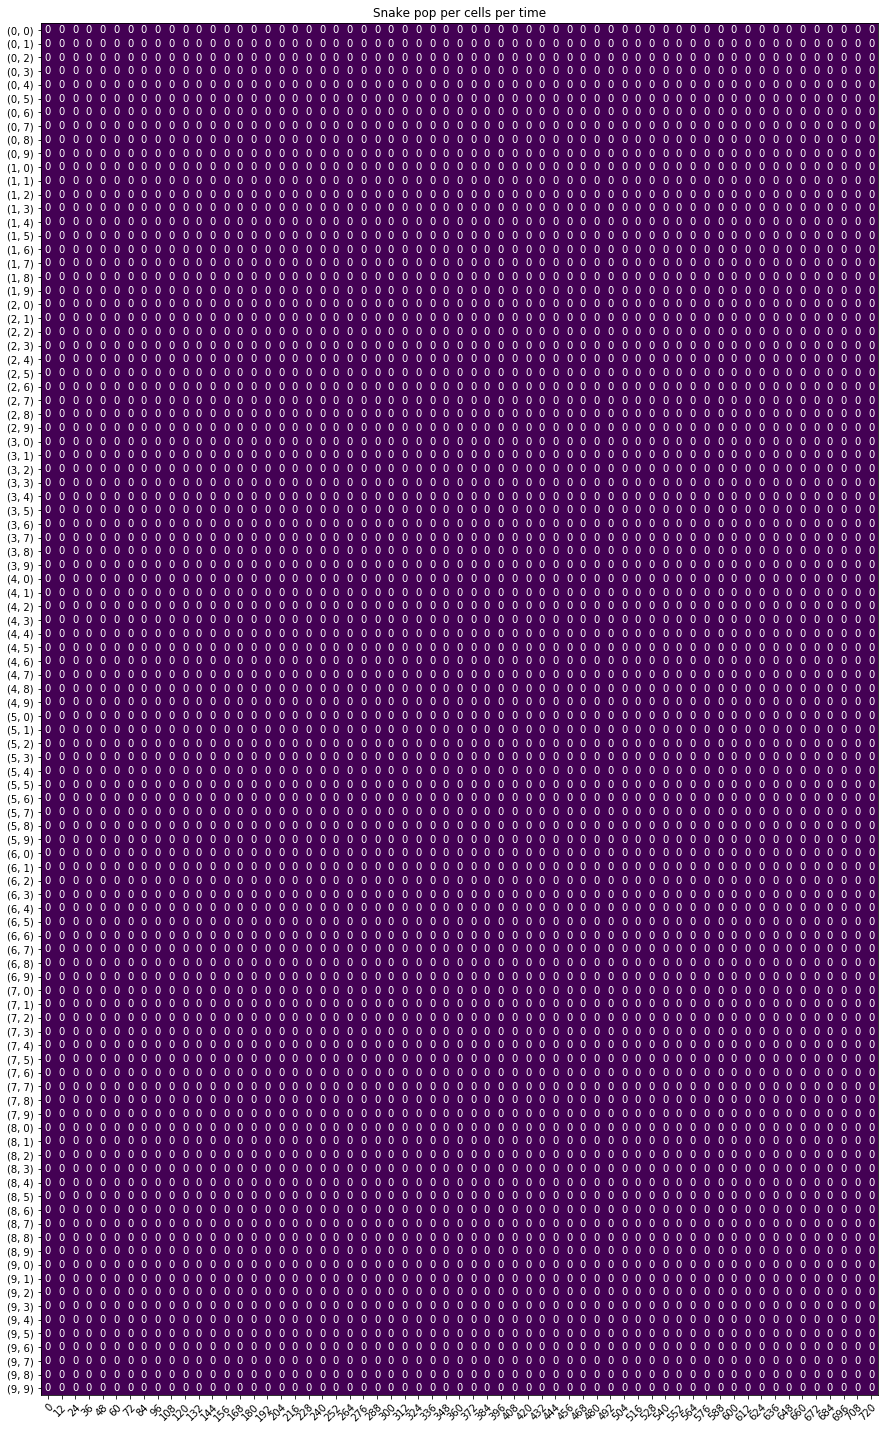

In [22]:

df = data[['time','cell_id','snake_pop']]
cell_ids =  cell_id_analysis(9,9)
cell_ids = [str(cell_id) for cell_id in cell_ids]
df =df[df['time'] <= 720]
df =df[df.cell_id.isin(cell_ids)]
newdf = df.pivot(index='cell_id', columns='time', values='snake_pop').fillna(0)
time = df['time'].unique()
info = np.array(newdf)
newdf.reset_index(inplace=True)
m = pd.DataFrame(newdf)
cells = m['cell_id'].unique()

fig, ax = plt.subplots(figsize=(15,30))
im = ax.imshow(info)

# We want to show all ticks...
ax.set_xticks(np.arange(len(time)))
ax.set_yticks(np.arange(len(cells)))
# ... and label them with the respective list entries
ax.set_xticklabels(time)
ax.set_yticklabels(cells)

# Rotate the tick labels and set their alignment.
plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
         rotation_mode="anchor")

# Loop over data dimensions and create text annotations.
for i in range(len(cells)):
    for j in range(len(time)):
        text = ax.text(j, i, int(info[i, j]),
                       ha="center", va="center", color="w")

ax.set_title("Snake pop per cells per time")
#fig.tight_layout()
plt.show()

In [56]:
def hour_tick(time_of_day):
    if time_of_day >= 23:
        time_of_day = 0
    else:
        time_of_day += 1
    return time_of_day

def day_tick(time_of_day,day_of_year):
    if (time_of_day+1) == 24:
        day_of_year += 1
    if (day_of_year+1) == 366:
        day_of_year = 0
    return day_of_year

end_time = 366*24
time_of_day = 0
day_of_year = 0 
for i in range(0,end_time,1):
    #print('global time: {}, time of day: {}'.format(i,time_of_day))
    print('global time: {}, day: {}'.format(time_of_day,day_of_year))
    day_of_year = day_tick(time_of_day,day_of_year)
    time_of_day = hour_tick(time_of_day)

global time: 0, day: 0
global time: 1, day: 0
global time: 2, day: 0
global time: 3, day: 0
global time: 4, day: 0
global time: 5, day: 0
global time: 6, day: 0
global time: 7, day: 0
global time: 8, day: 0
global time: 9, day: 0
global time: 10, day: 0
global time: 11, day: 0
global time: 12, day: 0
global time: 13, day: 0
global time: 14, day: 0
global time: 15, day: 0
global time: 16, day: 0
global time: 17, day: 0
global time: 18, day: 0
global time: 19, day: 0
global time: 20, day: 0
global time: 21, day: 0
global time: 22, day: 0
global time: 23, day: 0
global time: 0, day: 1
global time: 1, day: 1
global time: 2, day: 1
global time: 3, day: 1
global time: 4, day: 1
global time: 5, day: 1
global time: 6, day: 1
global time: 7, day: 1
global time: 8, day: 1
global time: 9, day: 1
global time: 10, day: 1
global time: 11, day: 1
global time: 12, day: 1
global time: 13, day: 1
global time: 14, day: 1
global time: 15, day: 1
global time: 16, day: 1
global time: 17, day: 1
global time:

global time: 9, day: 154
global time: 10, day: 154
global time: 11, day: 154
global time: 12, day: 154
global time: 13, day: 154
global time: 14, day: 154
global time: 15, day: 154
global time: 16, day: 154
global time: 17, day: 154
global time: 18, day: 154
global time: 19, day: 154
global time: 20, day: 154
global time: 21, day: 154
global time: 22, day: 154
global time: 23, day: 154
global time: 0, day: 155
global time: 1, day: 155
global time: 2, day: 155
global time: 3, day: 155
global time: 4, day: 155
global time: 5, day: 155
global time: 6, day: 155
global time: 7, day: 155
global time: 8, day: 155
global time: 9, day: 155
global time: 10, day: 155
global time: 11, day: 155
global time: 12, day: 155
global time: 13, day: 155
global time: 14, day: 155
global time: 15, day: 155
global time: 16, day: 155
global time: 17, day: 155
global time: 18, day: 155
global time: 19, day: 155
global time: 20, day: 155
global time: 21, day: 155
global time: 22, day: 155
global time: 23, day: 1

global time: 4, day: 300
global time: 5, day: 300
global time: 6, day: 300
global time: 7, day: 300
global time: 8, day: 300
global time: 9, day: 300
global time: 10, day: 300
global time: 11, day: 300
global time: 12, day: 300
global time: 13, day: 300
global time: 14, day: 300
global time: 15, day: 300
global time: 16, day: 300
global time: 17, day: 300
global time: 18, day: 300
global time: 19, day: 300
global time: 20, day: 300
global time: 21, day: 300
global time: 22, day: 300
global time: 23, day: 300
global time: 0, day: 301
global time: 1, day: 301
global time: 2, day: 301
global time: 3, day: 301
global time: 4, day: 301
global time: 5, day: 301
global time: 6, day: 301
global time: 7, day: 301
global time: 8, day: 301
global time: 9, day: 301
global time: 10, day: 301
global time: 11, day: 301
global time: 12, day: 301
global time: 13, day: 301
global time: 14, day: 301
global time: 15, day: 301
global time: 16, day: 301
global time: 17, day: 301
global time: 18, day: 301
gl

In [51]:
move_range = 2
for x in range(-move_range,move_range+1):
    print(x)

-2
-1
0
1
2


In [46]:
def day_tick(day_of_year):
    if time_of_day == (24-1):
        day_of_year += 1
    if day_of_year+1 == 366:
        day_of_year = 0
        
end_time = 365*24
day_of_year = 0        
for i in range(0,end_time,1):
    if i % 23==0:
        print('global time: {}, day: {}'.format(i,day_of_year))
    time_of_day = day_tick(day_of_year)        

global time: 0, day: 0
global time: 23, day: 0
global time: 46, day: 0
global time: 69, day: 0
global time: 92, day: 0
global time: 115, day: 0
global time: 138, day: 0
global time: 161, day: 0
global time: 184, day: 0
global time: 207, day: 0
global time: 230, day: 0
global time: 253, day: 0
global time: 276, day: 0
global time: 299, day: 0
global time: 322, day: 0
global time: 345, day: 0
global time: 368, day: 0
global time: 391, day: 0
global time: 414, day: 0
global time: 437, day: 0
global time: 460, day: 0
global time: 483, day: 0
global time: 506, day: 0
global time: 529, day: 0
global time: 552, day: 0
global time: 575, day: 0
global time: 598, day: 0
global time: 621, day: 0
global time: 644, day: 0
global time: 667, day: 0
global time: 690, day: 0
global time: 713, day: 0
global time: 736, day: 0
global time: 759, day: 0
global time: 782, day: 0
global time: 805, day: 0
global time: 828, day: 0
global time: 851, day: 0
global time: 874, day: 0
global time: 897, day: 0
global

In [2]:
import math
def probability_time_step_adjustment(probability_success,time_step,number_of_successes):
    p = probability_success
    q = 1-probability_success
    cn = math.factorial(int(time_step))/(math.factorial(int(time_step - number_of_successes))*math.factorial(int(number_of_successes)))
    prob = cn*p**(number_of_successes)*q**(time_step - number_of_successes)
    return prob


prob_of_success = (7/32)
time_step = 6
for i in range(time_step):
    new_prob =  probability_time_step_adjustment(probability_success = prob_of_success ,time_step = time_step,number_of_successes = i)
    print('i: {}, new prob: {}'.format(i,new_prob))

i: 0, new prob: 0.22737367544323206
i: 1, new prob: 0.38198777474462986
i: 2, new prob: 0.2673914423212409
i: 3, new prob: 0.0998261384665966
i: 4, new prob: 0.020963489077985287
i: 5, new prob: 0.002347910776734352
